In [8]:
import os
import glob
import json
import matplotlib.pyplot as plt
import re

In [9]:
functions = ['rastrigin', 'schwefel', 'griewank', 'ackley']
for function in functions:
    files = glob.glob(f'./results/{function}*_100_dim*.json')
    print(files)

['.\\rastrigin_10_partners_100_dim_10000_iters.json', '.\\rastrigin_3_partners_100_dim_10000_iters.json', '.\\rastrigin_5_partners_100_dim_10000_iters.json']
['.\\schwefel_10_partners_100_dim_10000_iters.json', '.\\schwefel_3_partners_100_dim_10000_iters.json', '.\\schwefel_5_partners_100_dim_10000_iters.json']
['.\\griewank_10_partners_100_dim_1000_iters.json', '.\\griewank_3_partners_100_dim_1000_iters.json', '.\\griewank_5_partners_100_dim_1000_iters.json']
['.\\ackley_10_partners_100_dim_1000_iters.json', '.\\ackley_3_partners_100_dim_1000_iters.json', '.\\ackley_5_partners_100_dim_1000_iters.json']


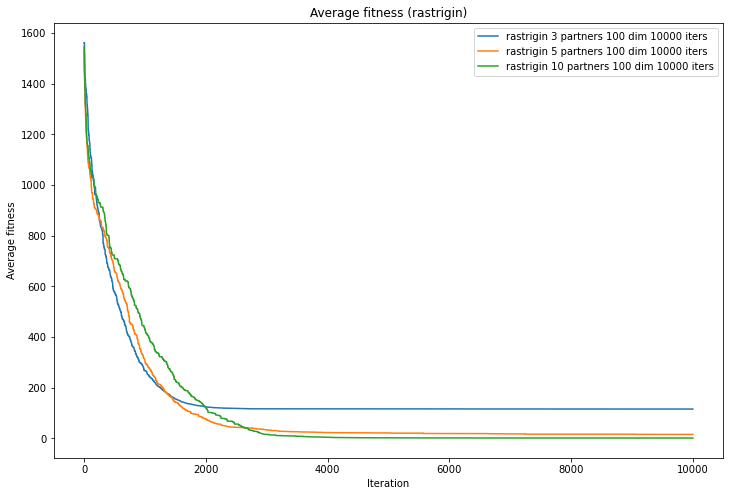

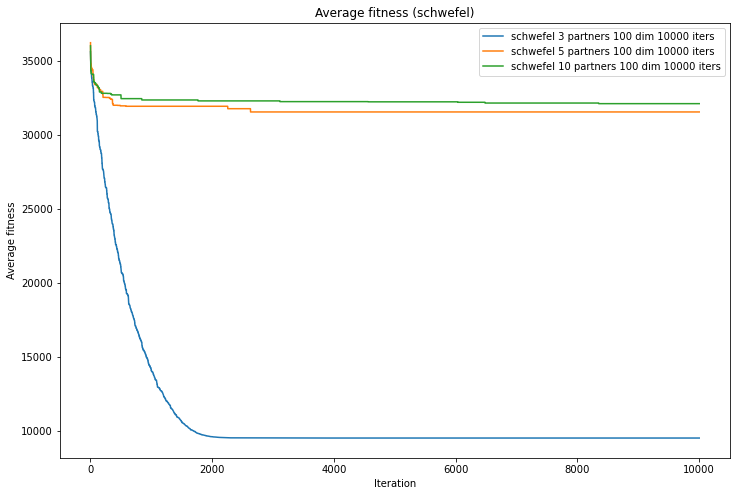

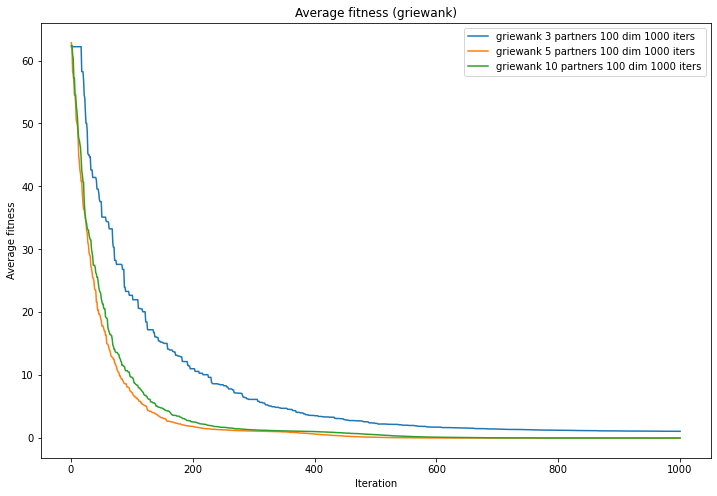

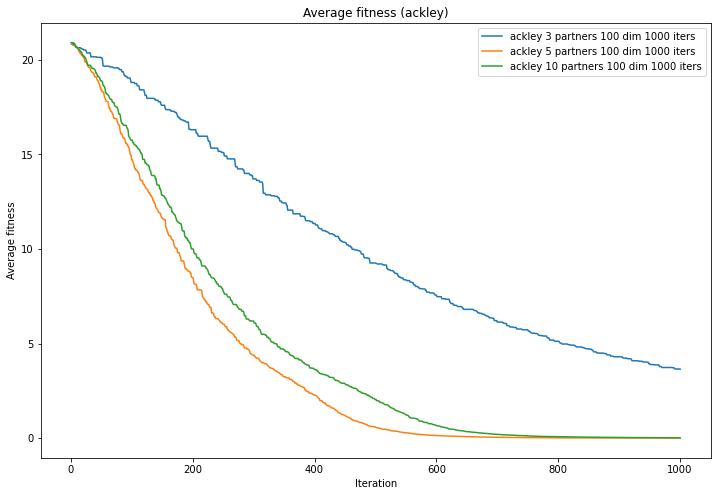

In [25]:
functions = ['rastrigin', 'schwefel', 'griewank', 'ackley']
parameter_regex = r'.*_(\d+)_partners_.*_dim_(\d+)_iters.*'

for function in functions:
    files = glob.glob(f'./results/{function}*_100_dim*.json')
    files = sorted(files, key=lambda f: int(re.match(parameter_regex, f).group(1)))
    results = []
    for file in files:
        with open(file, 'r') as reader:
            results.append(reader.read())
    
    
    results_as_json = [json.loads(result) for result in results]
    average_fitnesses = [res['average_fitness'] for res in results_as_json]
    
    iters = re.match(parameter_regex, files[0]).group(2)
    
    x = range(1, int(iters) + 1)
    plt.figure(figsize=(12, 8))
    plt.xlabel('Iteration')
    plt.ylabel('Average fitness')

    for i, fit in enumerate(average_fitnesses):
        y = fit
        plt.title(f'Average fitness ({function})')
        plt.plot(x, y, label=files[i][10:-5].replace("_", " "))
    
    plt.legend()
    plt.savefig(f'./results/average_fitness_{function}_100_dim_{iters}_iters_chart.png')

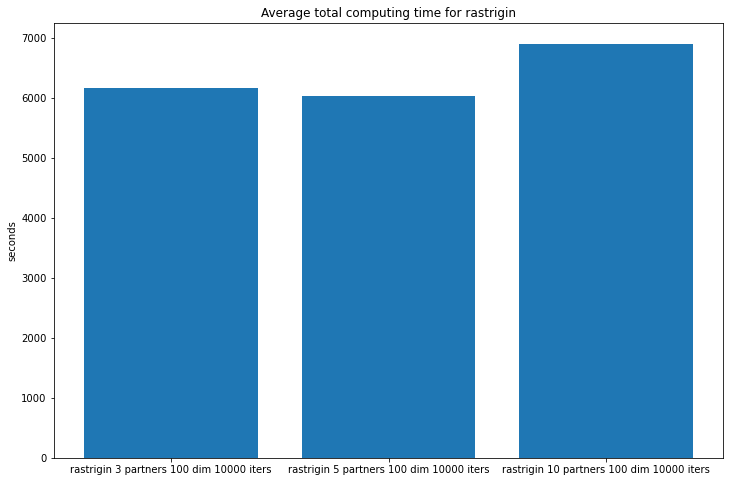

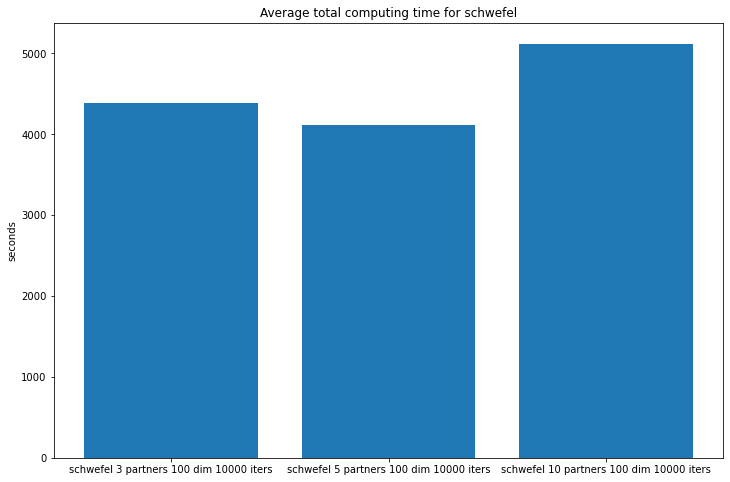

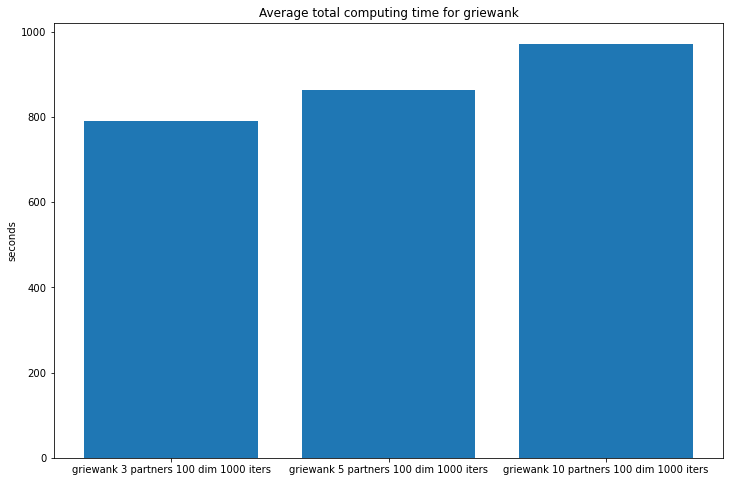

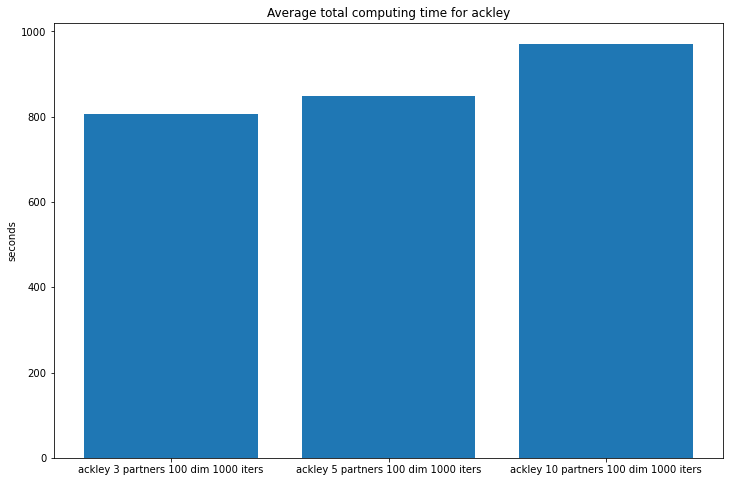

In [23]:
for function in functions:
    files = glob.glob(f'./results/{function}*_100_dim*.json')
    files = sorted(files, key=lambda f: int(re.match(parameter_regex, f).group(1)))
    results = []
    for file in files:
        with open(file, 'r') as reader:
            results.append(reader.read())
    
    
    results_as_json = [json.loads(result) for result in results]
    average_computing_time = [res['average_total_comupting_time'] for res in results_as_json]
    
    iters = re.match(parameter_regex, files[0]).group(2)
    
    x = [file[10:-5].replace("_", " ") for file in files]
    y = average_computing_time
    plt.figure(figsize=(12,8))
    plt.title(f'Average total computing time for {function}')
    plt.ylabel('seconds')
    plt.bar(x, y)
    plt.savefig(f'./results/computing_time_{function}_100_dim_{iters}_iters_chart.png')